# Imports + Setup

In [1]:
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

startTime = time.time()

plt.rcParams.update({'figure.figsize':(11,7), 'figure.dpi':120})
image_dest = 'results_images/'
visual_specs={'fontsize':14, 'palette':'Greys', 'saturation':0.5}
fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
datapath = '../Data/'

id_col = 'SPA_PER_ID'
event_col = 'CMIS_MATCH'

# Load Predictions

In [2]:
filename = 'log_predictions_time.pickle'
infile = open(datapath+filename,'rb')
df = pickle.load(infile)
infile.close()

print(len(df))

df.head()

3231051


,prediction,CMIS_MATCH,SPA_PER_ID,SPA_PREM_ID,MONTH,max_likelihood,BACKWARD_MONTH
0,0.001749,False,3,98612,0,NaN,-58
1,0.001749,False,3,98612,1,NaN,-57
2,0.001749,False,3,98612,8,NaN,-50
3,0.001749,False,3,98612,13,NaN,-45
4,0.001749,False,3,98612,18,NaN,-40


# Plot
Predicted Risk vs Time Ago

In [3]:
length = str(len(df))
length = length[:-6] + ',' + length[-6:-3] + ',' + length[-3:]
length

'3,231,051'

In [4]:
sample = df.iloc[:30000]

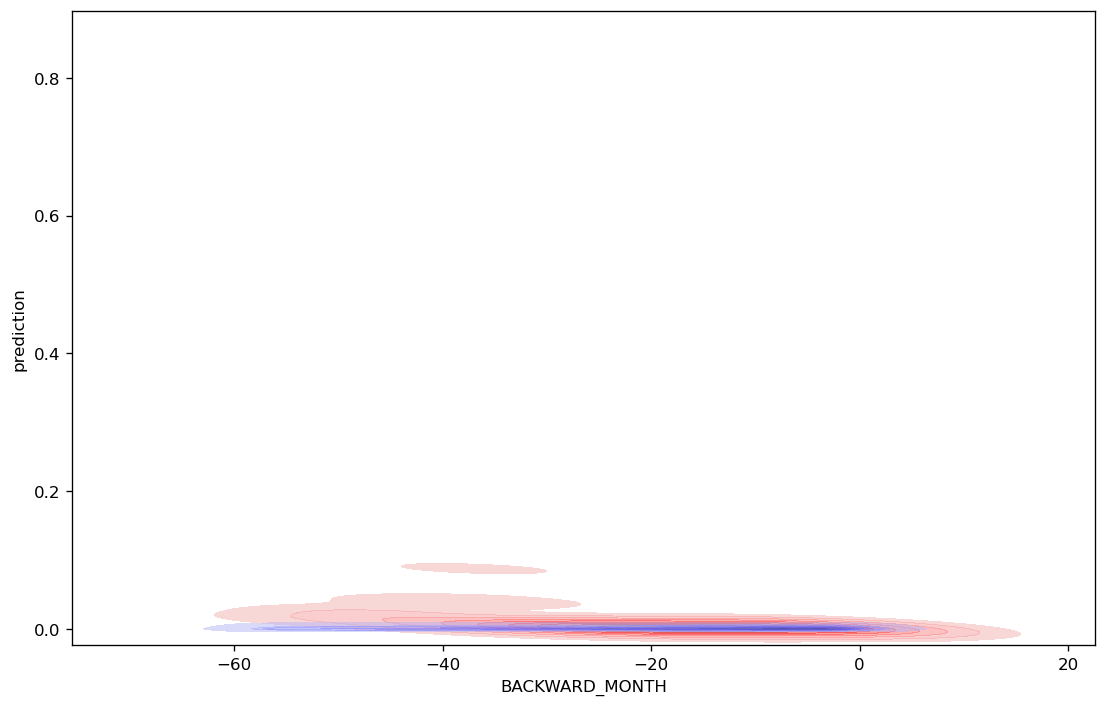

In [5]:
# Plot Positives
sns.kdeplot(
    data=sample[sample['CMIS_MATCH']], 
    x='BACKWARD_MONTH', 
    y='prediction', 
    color='red',
    fill=True,
    alpha=0.5,
    #bins=58,
    #discrete=(True,False),
    #thresh=None,
    #cbar=True,
    label='Positives'
)

# Plot Negatives
sns.kdeplot(
    data=sample[~sample['CMIS_MATCH']], 
    x='BACKWARD_MONTH', 
    y='prediction', 
    color='blue',
    fill=True,
    alpha=0.5,
    #bins=58,
    #discrete=(True,False),
    #thresh=None,
    #cbar=True,
    label='Negatives'
)

# Save Figure
plt.savefig(fname=image_dest+'Density_Time.png', bbox_inches='tight')

# Show Figure
plt.show()

# Calculate Time

In [6]:
from custom_methods.calc_time import calc_time_from_sec

calc_time_from_sec(time.time() - startTime)

hours:minutes:seconds = 0:1:4.02582311630249
